# Position of a star

You meaure the position of a star $N$ times with the *same* telescope (errors are homoscedastic). Let's say the underlaying process is gaussian, the true position in $\mu = 1$ and the errors are $\sigma = 0.2$

## Part 1

In [32]:
import numpy as np
import sys
sys.path.append(r"C:\Users\Phisio97\Documents\Astrostatistics\Notebooks")
from Utilities import plot_settings
import matplotlib.pyplot as plt

np.random.seed(42)

- **Generate fake mock data.Treat each of these observations as an estimate of the true distribution. We'll center a gaussian (with the known $\sigma$) at each point ($\mu$ value). This is the probability of each point $p(x_{i}|\mu, \sigma)$.**

In [33]:
true_mu = 1
true_sigma = 0.2
N_data = 5
data = np.random.normal(loc = true_mu, scale = true_sigma, size=N_data)

In [34]:
from scipy.stats import norm

In [35]:
xgrid = np.linspace(0,2,1000)

In [36]:
li = np.array([norm.pdf(xgrid, loc=mu, scale=true_sigma) for mu in data])

- **Plot each individual likelihood. Also plot their product.**

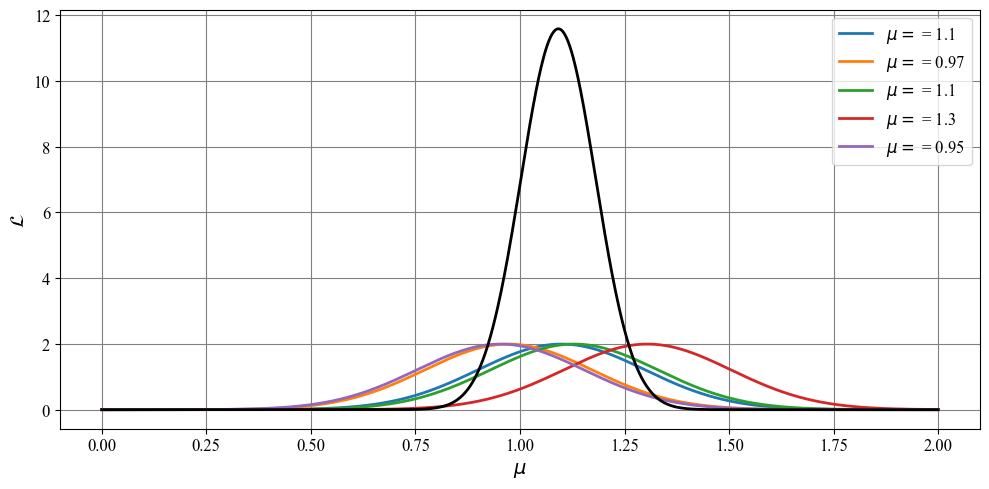

In [37]:
for i,mu in enumerate(data):
    plt.plot(xgrid, li[i], lw=2, label=r'$\mu = $'+f' = {mu:.2}')
plt.plot(xgrid, np.prod(li, axis=0), lw=2, color='black')
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\mathcal{L}$")
plt.legend()

- **Read off the maximum solution.**

In [38]:
mu_maxL = data[np.argmax(np.prod(li, axis=1))]
max_idx = np.argmax(np.prod(li, axis=1))
print(f'Maximum Likelihood numerical solution : {mu_maxL:.3}')

Maximum Likelihood numerical solution : 1.1


- **Compare with the MLE $\hat{\mu} = \frac{1}{N} \sum_{i=1}^{N} x_i$ and $\hat{\sigma_{\mu}} = \frac{\sigma}{\sqrt{N}}$**

In [39]:
mu_MLE = data.mean()
print(f'MLE solution        : {mu_MLE:.3}')
print(f'Relative difference : {abs(mu_maxL - mu_MLE)/min(mu_MLE, mu_maxL)*100 :.3} %')

MLE solution        : 1.09
Relative difference : 0.691 %


What happens if $N$ increases (Increasing sample dimension)?

In [25]:
Ns = [50, 100, 500, 1000, 2000, 5000, 10000]
results = []
stds = []
for N in Ns:
    data = np.random.normal(loc = true_mu, scale = true_sigma, size=N)
    li = np.array([norm.pdf(xgrid, loc=mu, scale=true_sigma) for mu in data])
    mu_maxL = data[np.argmax(np.prod(li, axis=1))]
    mu_MLE = data.mean()
    stds.append(np.std(data)/np.sqrt(len(data)))
    results.append((mu_maxL, mu_MLE))
    print(f'Maximum Likelihood numerical solution : {mu_maxL:.3}')
    print(f'MLE solution        : {mu_MLE:.3}')
    print(f'Relative difference : {abs(mu_maxL - mu_MLE)/min(mu_MLE, mu_maxL)*100 :.3} %')
    print('\n')
    
results = np.array(results)

Maximum Likelihood numerical solution : 1.14
MLE solution        : 0.971
Relative difference : 17.7 %


Maximum Likelihood numerical solution : 1.1
MLE solution        : 1.0
Relative difference : 9.99 %


Maximum Likelihood numerical solution : 1.09
MLE solution        : 1.0
Relative difference : 8.65 %


Maximum Likelihood numerical solution : 0.79
MLE solution        : 1.0
Relative difference : 26.5 %


Maximum Likelihood numerical solution : 0.683
MLE solution        : 0.997
Relative difference : 46.0 %


Maximum Likelihood numerical solution : 1.18
MLE solution        : 0.999
Relative difference : 18.5 %


Maximum Likelihood numerical solution : 1.09
MLE solution        : 0.997
Relative difference : 9.21 %




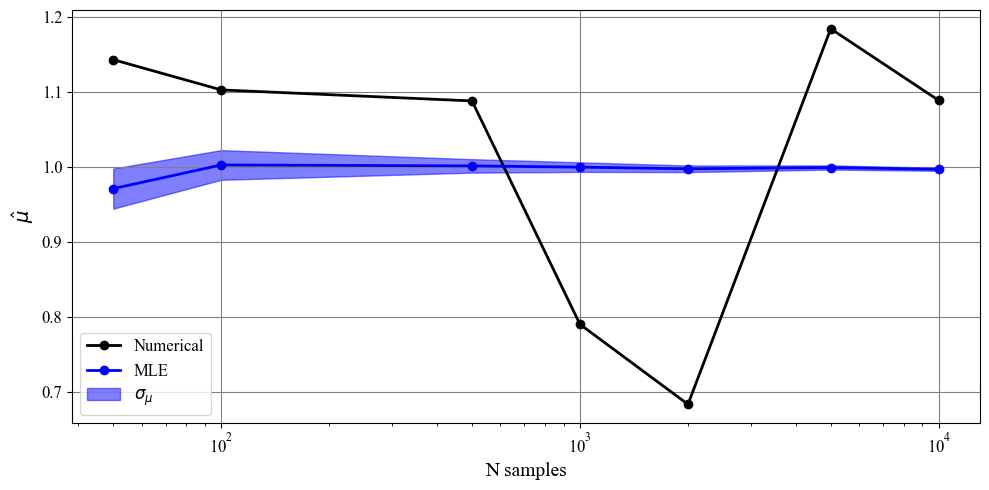

In [26]:
plt.plot(Ns, results.T[0], marker='o', lw=2, color='black', label='Numerical')
plt.plot(Ns, results.T[1], marker='o', lw=2, color='blue', label='MLE')
plt.fill_between(Ns, results.T[1] + stds, results.T[1]-stds, color='blue', label=r'$\sigma_{\mu}$', alpha=0.5)
plt.xlabel('N samples')
plt.xscale('log')
plt.ylabel(r'$\hat{\mu}$')
plt.legend()

As shown by the plot, the consistency of the Maximum Likelihood Estimator is apparent. As $N\to \infty$, $\hat{\mu}\to\mu_{true}$

## Part 2

- do a rough $2^{\text{nd}}$ order differentiation of our log-likelihood function
- divide by $\Delta \theta^{2}$
- multiply by $-1$
- take the sqaure root

In [43]:
smu = -1 * np.diff(np.log(np.prod(li, axis=0)), n=2) / (xgrid[1] - xgrid[0])**2
smu = 1/np.sqrt(smu)[max_idx]
MLE_error = np.std(data)/np.sqrt(len(data))

In [44]:
print(f'MLE numeric : {mu_maxL:.4} +/- {smu:.2}')
print(f'MLE analytic: {mu_MLE:.4} +/- {MLE_error:.2}')

MLE numeric : 1.099 +/- 0.089
MLE analytic: 1.092 +/- 0.057


## Part 3

Heteroscedastic errors : N measurements with different $\sigma$ extracted from $\mathcal{N}(0.2, 0.5)$

In [54]:
N2 = 10
errs = abs(norm(loc=0.2, scale=0.05).rvs(N2))
meas = np.array([norm(loc=true_mu, scale=err).rvs(1) for err in errs])

In [55]:
li2 = np.array([norm.pdf(xgrid, loc=mu, scale=err) for mu,err in zip(meas,errs)])

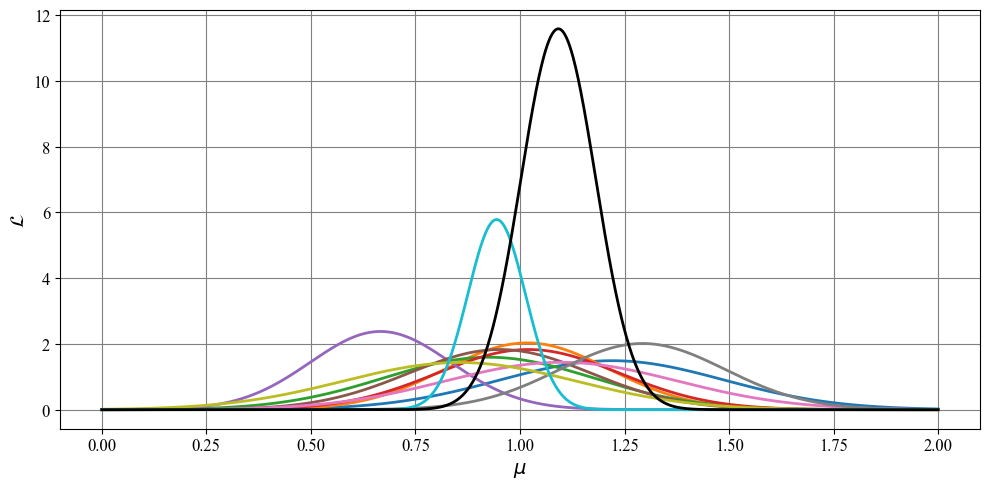

In [56]:
for i,mu in enumerate(meas):
    plt.plot(xgrid, li2[i], lw=2)
plt.plot(xgrid, np.prod(li, axis=0), lw=2, color='black')
plt.xlabel(r"$\mu$");
plt.ylabel(r"$\mathcal{L}$");

In [57]:
mu_maxL2 = meas[np.argmax(np.prod(li2, axis=1))]
max_idx2 = np.argmax(np.prod(li2, axis=1))
print(f'Maximum Likelihood numerical solution : {mu_maxL2[0]:.3}')

Maximum Likelihood numerical solution : 1.22


Compute fisher matrix error

In [58]:
smu2 = -1 * np.diff(np.log(np.prod(li2, axis=0)), n=2) / (xgrid[1] - xgrid[0])**2
smu2 = 1/np.sqrt(smu2)[max_idx2]

In [59]:
mu_MLE2 = np.average(meas, weights=errs, axis=0)
MLE_error2 = np.sqrt(np.sum(1/errs**2))**(-1)

In [60]:
print(f'MLE numeric : {mu_maxL2[0]:.4} +/- {smu2:.2}')
print(f'MLE analytic: {mu_MLE2[0]:.4} +/- {MLE_error2:.2}')

MLE numeric : 1.22 +/- 0.05
MLE analytic: 1.011 +/- 0.05
